In [1]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas as hvplot
import matplotlib.pyplot as plt
import requests
import os
import csv
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np


Bad key savefig.frameon in file /Users/jinyoung/Documents/Anaconda/miniconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/jinyoung/Documents/Anaconda/miniconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/jinyoung/Documents/Anaconda/miniconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, li

In [2]:
load_dotenv()

True

In [3]:
# Import API's/Data Sets 

In [4]:
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

# Create the Alpaca API object
api = tradeapi.REST(
alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [5]:
snp_path = Path('SP_100_Symbol.csv')
tickers = []
with open(snp_path, 'r') as cvsfile: 
    snp_reader = csv.reader(cvsfile, delimiter= ',')
    header = next(snp_reader)   
    
    for column in snp_reader:
#         print(row)
        tickers.append(str(column[0]))
#         print(tickers)

## Please select your stocks to build your portfolio

In [6]:
import tkinter
from tkinter import *

snp_tickers = ['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'ALL', 'AMGN', 'AMT', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BKNG', 'BLK', 'BMY', 'BRK.B', 'C', 'CAT', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX', 'DD', 'DHR', 'DIS', 'DOW', 'DUK', 'EMR', 'EXC', 'F', 'FB', 'FDX', 'GD', 'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KHC', 'KMI', 'KO', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE', 'NVDA', 'ORCL', 'OXY', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX', 'SLB', 'SO', 'SPG', 'T', 'TGT', 'TMO', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM']

window_snp = tkinter.Tk()
window_snp.title("S&P 100 Stocks")
label_snp = tkinter.Label(window_snp, text="Please choose up to 10 stocks from the following list").pack()
window_snp.geometry('700x400')


clicked = StringVar(window_snp)
clicked.set(snp_tickers[0]) # default value

menu = OptionMenu(window_snp, clicked, *snp_tickers)
menu.pack()

stocks_chosen = []
def stock_choice():
    stocks_chosen.append(clicked.get())
    print ("You've selected " + clicked.get())

button = Button(window_snp, text="OK", command=stock_choice)
button.pack()

mainloop()


You've selected AAPL
You've selected AIG
You've selected BK
You've selected CL
You've selected COST
You've selected FB
You've selected GD
You've selected EXC
You've selected PFE


In [7]:
stocks_chosen = list(dict.fromkeys(stocks_chosen))
print(stocks_chosen)

['AAPL', 'AIG', 'BK', 'CL', 'COST', 'FB', 'GD', 'EXC', 'PFE']


In [8]:
weight_preferences = [
    "Equal Weighting", 
    "Choose Your Own Weight"
]

window_weight = tkinter.Tk()
window_weight.title("Weighting")
label_weight = tkinter.Label(window_weight, text="Please choose your weighting preferences").pack()
window_weight.geometry('700x400')


clicked = StringVar(window_weight)
clicked.set(weight_preferences[0]) # default value

menu = OptionMenu(window_weight, clicked, *weight_preferences)
menu.pack()

weight_chosen = []
def weight_choice():
    weight_chosen.append(clicked.get())
    print ("You've selected " + clicked.get())
    
    
    
button = Button(window_weight, text="OK", command=weight_choice)
button.pack()

mainloop()


You've selected Equal Weighting


In [9]:
#Equal Weighting
if clicked.get() == "Equal Weighting":
    sum_weight = len(stocks_chosen)
    equal_weighting = 1 / sum_weight 

    weighting_list = []

    for x in stocks_chosen:
        weighting_list.append(equal_weighting)
        if x == stocks_chosen[-1]: 
            print(weighting_list)

            
#Custom Weighting
else:
    root = tkinter.Tk()
    root.title("Custom Weight")
    root.geometry("800x900")


    my_entries = []
    def weight_custom():
        entry_list = ''

        for entries in my_entries:
            entry_list = entry_list + str(entries.get()) + "\n"
            my_label.config(text="Your Weighting: " + "\n" + entry_list)

        print("You're weighting for the portfolio is:" "\n" + (entry_list))


    for x in range(len(stocks_chosen)):
        my_entry = Entry(root)
        my_entry.grid(row=x, column = 5, pady=20, padx=5)
        my_entries.append(my_entry)

       #PROBLEM 1
        for y in stocks_chosen:
            label2 = Label(root, text = y)
            label2.grid(row = x, column=3, pady=20, padx=5)



    my_button = Button(root, text = "Done", command =weight_custom)
    my_button.grid(row=15, column=5, pady=20)

    my_label = Label(root, text='Please put your custom weights percentage in decimal places up to 1.00')
    my_label.grid(row=38, column=5, pady=20)
    my_label.pack

    root.mainloop()


[0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111]


In [113]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-08-14", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = []
tickers.extend(stocks_chosen)

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio_df = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

portfolio_df_closing_prices = pd.DataFrame()

for ticker in tickers:
    portfolio_df_closing_prices[ticker] = portfolio_df[ticker]["close"]

portfolio_df_closing_prices.index = portfolio_df_closing_prices.index.date
portfolio_df_closing_prices.head()

AAPL  AIG   BK     CL    COST      FB      GD    EXC    PFE
2020-08-14  459.78   31  NaN  77.02  336.07  261.24  156.43  37.93  38.06

In [11]:
start_date = pd.Timestamp("2020-08-14", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'ALL', 'AMGN', 'AMT', 'AMZN', 'AXP', 'BA', 'BAC', 'BIIB', 'BK', 'BKNG', 'BLK', 'BMY', 'BRK.B', 'C', 'CAT', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX', 'DD', 'DHR', 'DIS', 'DOW', 'DUK', 'EMR', 'EXC', 'F', 'FB', 'FDX', 'GD', 'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KHC', 'KMI', 'KO', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE', 'NVDA', 'ORCL', 'OXY', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX', 'SLB', 'SO', 'SPG', 'T', 'TGT', 'TMO', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM']

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
snp_df = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


snp_df_closing_prices = pd.DataFrame()

for ticker in tickers:
    snp_df_closing_prices[ticker] = snp_df[ticker]["close"]

snp_df_closing_prices.index = snp_df_closing_prices.index.date
snp_df_closing_prices.head()

AAPL   ABBV    ABT  ACN   ADBE  AIG    ALL    AMGN     AMT  \
2020-08-14  459.78  95.11  99.99  NaN  447.5   31  96.11  239.71  250.12   

            AMZN  ...     UNH     UNP     UPS    USB       V     VZ     WBA  \
2020-08-14  3148  ...  323.86  191.92  160.74  37.78  196.63  58.79  41.905   

             WFC  WMT    XOM  
2020-08-14  25.3  NaN  43.21  

[1 rows x 101 columns]

In [12]:
## Analysis

In [13]:
# Format current date as ISO format
start_date = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2019-12-31", tz="America/New_York").isoformat()

# Set the tickers
tickers = []
tickers.extend(stocks_chosen)

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio_df = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

portfolio_df_closing_prices = pd.DataFrame()

for ticker in tickers:
    portfolio_df_closing_prices[ticker] = portfolio_df[ticker]["close"]

portfolio_df_closing_prices.index = portfolio_df_closing_prices.index.date
portfolio_df_closing_prices.head()

AAPL    AIG      BK     CL    COST     FB      GD    EXC    PFE
2015-01-02  109.30  56.10  38.080  69.05  141.61  78.45  138.43  37.57  31.33
2015-01-05  106.25  55.00  39.410  68.55  139.94  77.19  135.64  36.52  31.19
2015-01-06  106.23  54.19  36.030  67.77  141.84  76.15  135.74  36.21  31.45
2015-01-07  107.75  54.47  36.770  68.32  144.32  76.12  135.14  36.27  31.85
2015-01-08  111.87  54.34  39.605  69.26  145.56  78.19  138.39  36.55  32.52

In [109]:
daily_returns = portfolio_df_closing_prices.pct_change().dropna()

daily_returns.head()

AAPL       AIG        BK        CL      COST        FB  \
2015-01-05 -0.027905 -0.019608  0.034926 -0.007241 -0.011793 -0.016061   
2015-01-06 -0.000188 -0.014727 -0.085765 -0.011379  0.013577 -0.013473   
2015-01-07  0.014309  0.005167  0.020538  0.008116  0.017484 -0.000394   
2015-01-08  0.038237 -0.002387  0.077101  0.013759  0.008592  0.027194   
2015-01-09  0.001162 -0.018587 -0.014392 -0.009674 -0.015732 -0.005627   

                  GD       EXC       PFE  
2015-01-05 -0.020155 -0.027948 -0.004469  
2015-01-06  0.000737 -0.008488  0.008336  
2015-01-07 -0.004420  0.001657  0.012719  
2015-01-08  0.024049  0.007720  0.021036  
2015-01-09  0.004336 -0.001642  0.004151

In [18]:
daily_std = daily_returns.std()
daily_std.head(10)

AAPL    0.015691
AIG     0.013476
BK      0.024107
CL      0.010884
COST    0.019241
FB      0.017794
GD      0.011916
EXC     0.012109
PFE     0.011420
dtype: float64

In [19]:
daily_std_df = pd.DataFrame(daily_std, columns = ["Std Dev"])
daily_std_df.head(10)

Std Dev
AAPL  0.015691
AIG   0.013476
BK    0.024107
CL    0.010884
COST  0.019241
FB    0.017794
GD    0.011916
EXC   0.012109
PFE   0.011420

In [63]:
daily_std_hvplot = daily_std_df.hvplot.bar(label = "Std Dev", width=600).opts(color="green")


In [87]:
volatility = daily_std * np.sqrt(252*5)
volatility.sort_values(inplace=True)
volatility.head(10)

CL      0.386348
PFE     0.405353
GD      0.422983
EXC     0.429809
AIG     0.478366
AAPL    0.556964
FB      0.631616
COST    0.682998
BK      0.855703
dtype: float64

In [65]:
volatility_df = pd.DataFrame(volatility, columns = ["Volatility"])
volatility_df

Volatility
CL      0.386348
PFE     0.405353
GD      0.422983
EXC     0.429809
AIG     0.478366
AAPL    0.556964
FB      0.631616
COST    0.682998
BK      0.855703

In [69]:
volatility_hvplot = volatility_df.hvplot.bar(label = "Volatility", width = 600)


In [70]:
volatility_hvplot + daily_std_hvplot

:Layout
   .Bars.Volatility :Bars   [index]   (Volatility)
   .Bars.Std_Dev    :Bars   [index]   (Std Dev)

In [68]:
daily_cumulative_returns = (1+daily_returns).cumprod()
daily_cumulative_returns.head()

AAPL       AIG        BK        CL      COST        FB  \
2015-01-05  0.972095  0.980392  1.034926  0.992759  0.988207  0.983939   
2015-01-06  0.971912  0.965954  0.946166  0.981463  1.001624  0.970682   
2015-01-07  0.985819  0.970945  0.965599  0.989428  1.019137  0.970300   
2015-01-08  1.023513  0.968627  1.040047  1.003041  1.027894  0.996686   
2015-01-09  1.024703  0.950624  1.025079  0.993338  1.011722  0.991077   

                  GD       EXC       PFE  
2015-01-05  0.979845  0.972052  0.995531  
2015-01-06  0.980568  0.963801  1.003830  
2015-01-07  0.976233  0.965398  1.016598  
2015-01-08  0.999711  0.972851  1.037983  
2015-01-09  1.004045  0.971254  1.042292

In [50]:
daily_cumulative_returns.hvplot(xlabel = "Date", ylabel = "Return").opts(yformatter="%.0f")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [51]:
#calculating holding period return
beg_prices =portfolio_df_closing_prices.iloc[0]
end_prices = portfolio_df_closing_prices.iloc[-1]

holding_prices = pd.concat([beg_prices, end_prices], axis = 1, join="outer")
holding_prices = holding_prices.transpose()

holding_period_return = holding_prices.pct_change().dropna()
holding_period_return

AAPL       AIG        BK        CL      COST        FB  \
2019-12-31  1.684081 -0.085205  0.321429 -0.003041  1.075418  1.614277   

                  GD       EXC      PFE  
2019-12-31  0.273712  0.213202  0.24992

In [75]:
holding_return_plot = holding_period_return.hvplot.bar(height = 500)
holding_return_plot

:Bars   [index,Variable]   (value)

In [ ]:
#hvplot.bar

In [78]:
#correlation 
correlation = daily_returns.corr()
correlation

AAPL       AIG        BK        CL      COST        FB        GD  \
AAPL  1.000000  0.312997  0.181016  0.240970  0.215508  0.460308  0.352892   
AIG   0.312997  1.000000  0.283016  0.300000  0.248741  0.263967  0.443245   
BK    0.181016  0.283016  1.000000  0.105614  0.084197  0.154611  0.234101   
CL    0.240970  0.300000  0.105614  1.000000  0.224500  0.211538  0.294248   
COST  0.215508  0.248741  0.084197  0.224500  1.000000  0.159948  0.219806   
FB    0.460308  0.263967  0.154611  0.211538  0.159948  1.000000  0.303213   
GD    0.352892  0.443245  0.234101  0.294248  0.219806  0.303213  1.000000   
EXC   0.145502  0.130462  0.047936  0.381264  0.120417  0.120944  0.192809   
PFE   0.305262  0.313825  0.204264  0.276668  0.180694  0.266842  0.391609   

           EXC       PFE  
AAPL  0.145502  0.305262  
AIG   0.130462  0.313825  
BK    0.047936  0.204264  
CL    0.381264  0.276668  
COST  0.120417  0.180694  
FB    0.120944  0.266842  
GD    0.192809  0.391609  
EXC   1.000000  0.189769  
PFE   0.189769  1.000000

In [81]:
correlation.hvplot.heatmap()

:HeatMap   [columns,index]   (value)

In [82]:
## Evaluating Reward-to-risk (Sharpe Ratio) of each stock
sharpe_ratios = (daily_returns.mean() * 252*5) / volatility
sharpe_ratios

AAPL    2.056485
AIG     0.053558
BK      0.755002
CL      0.185596
COST    1.413515
EXC     0.666440
FB      1.843547
GD      0.785098
PFE     0.754185
dtype: float64

In [83]:
sharpe_ratios.hvplot(kind="bar", title="Sharpe Ratios")

:Bars   [index]   (0)

AAPL       AIG        BK        CL      COST        FB  \
2015-01-05 -0.027905 -0.019608  0.034926 -0.007241 -0.011793 -0.016061   
2015-01-06 -0.000188 -0.014727 -0.085765 -0.011379  0.013577 -0.013473   
2015-01-07  0.014309  0.005167  0.020538  0.008116  0.017484 -0.000394   
2015-01-08  0.038237 -0.002387  0.077101  0.013759  0.008592  0.027194   
2015-01-09  0.001162 -0.018587 -0.014392 -0.009674 -0.015732 -0.005627   

                  GD       EXC       PFE  
2015-01-05 -0.020155 -0.027948 -0.004469  
2015-01-06  0.000737 -0.008488  0.008336  
2015-01-07 -0.004420  0.001657  0.012719  
2015-01-08  0.024049  0.007720  0.021036  
2015-01-09  0.004336 -0.001642  0.004151

In [128]:
# Format current date as ISO format
start_date = pd.Timestamp("2015-01-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Set the tickers
tickers = []
tickers.extend(stocks_chosen)

for ticker in tickers:
    portfolio_df[ticker] 
    
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio_df = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

portfolio_df.head()

AAPL                                      AIG  \
                             open    high     low   close    volume   open   
time                                                                         
2015-02-02 00:00:00-05:00  118.04  119.17  116.08  118.62  55113516  49.04   
2015-02-03 00:00:00-05:00  118.46  119.09  117.61  118.60  43555395  50.80   
2015-02-04 00:00:00-05:00  118.50  120.51  118.31  119.55  63181345  51.07   
2015-02-05 00:00:00-05:00  120.02  120.23  119.25  119.94  36157432  51.26   
2015-02-06 00:00:00-05:00  120.05  120.25  118.45  118.91  38899318  51.97   

                                                          ...      GD  \
                            high    low  close    volume  ...    open   
time                                                      ...           
2015-02-02 00:00:00-05:00  50.57  48.98  50.45  10379143  ...  133.19   
2015-02-03 00:00:00-05:00  51.39  50.60  51.34   8440737  ...  136.90   
2015-02-04 00:00:00-05:00  51.91  51.05  51.52   9037237  ...  138.75   
2015-02-05 00:00:00-05:00  51.87  51.15  51.61   5525173  ...  138.56   
2015-02-06 00:00:00-05:00  52.55  51.95  52.09   9076547  ...  138.69   

                                                                  PFE          \
                               high     low   close     volume   open    high   
time                                                                            
2015-02-02 00:00:00-05:00  136.4900  132.50  136.11  1670072.0  31.43  31.650   
2015-02-03 00:00:00-05:00  139.0950  136.47  138.96  1600669.0  31.79  32.160   
2015-02-04 00:00:00-05:00  139.8700  138.26  138.54  1256183.0  31.97  32.270   
2015-02-05 00:00:00-05:00  139.1999  138.02  138.68  1019937.0  33.04  33.200   
2015-02-06 00:00:00-05:00  140.3500  138.30  139.29  1171089.0  32.96  33.415   

                                                   
                             low  close    volume  
time                                               
2015-02-02 00:00:00-05:00  31.02  31.65  19083762  
2015-02-03 00:00:00-05:00  31.46  32.05  27486139  
2015-02-04 00:00:00-05:00  31.72  32.07  32448100  
2015-02-05 00:00:00-05:00  32.60  33.01  52626421  
2015-02-06 00:00:00-05:00  32.73  33.18  31145287  

[5 rows x 45 columns]

In [129]:
#monte_carlo
#weights = []
#weights.extend()
MC_dist = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111],
    num_simulation = 1000,
    num_trading_days = 252*5
)

MC_dist.portfolio_data.head(10)



AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2015-02-02 00:00:00-05:00  118.04  119.17  116.08  118.62  55113516   
2015-02-03 00:00:00-05:00  118.46  119.09  117.61  118.60  43555395   
2015-02-04 00:00:00-05:00  118.50  120.51  118.31  119.55  63181345   
2015-02-05 00:00:00-05:00  120.02  120.23  119.25  119.94  36157432   
2015-02-06 00:00:00-05:00  120.05  120.25  118.45  118.91  38899318   
2015-02-09 00:00:00-05:00  118.55  119.84  118.43  119.72  33755237   
2015-02-10 00:00:00-05:00  120.17  122.15  120.16  122.02  52811215   
2015-02-11 00:00:00-05:00  122.86  124.92  122.50  124.87  64917482   
2015-02-12 00:00:00-05:00  126.06  127.48  125.57  126.43  65727045   
2015-02-13 00:00:00-05:00  127.28  127.28  125.65  127.08  46474284   

                                          AIG                       ...  \
                          daily_return   open   high    low  close  ...   
time                                                                ...   
2015-02-02 00:00:00-05:00          NaN  49.04  50.57  48.98  50.45  ...   
2015-02-03 00:00:00-05:00    -0.000169  50.80  51.39  50.60  51.34  ...   
2015-02-04 00:00:00-05:00     0.008010  51.07  51.91  51.05  51.52  ...   
2015-02-05 00:00:00-05:00     0.003262  51.26  51.87  51.15  51.61  ...   
2015-02-06 00:00:00-05:00    -0.008588  51.97  52.55  51.95  52.09  ...   
2015-02-09 00:00:00-05:00     0.006812  51.74  52.47  51.52  52.13  ...   
2015-02-10 00:00:00-05:00     0.019211  52.53  52.77  51.96  52.41  ...   
2015-02-11 00:00:00-05:00     0.023357  52.32  52.36  51.69  52.25  ...   
2015-02-12 00:00:00-05:00     0.012493  52.31  52.69  52.08  52.41  ...   
2015-02-13 00:00:00-05:00     0.005141  51.21  54.09  51.10  53.91  ...   

                               GD                                    PFE  \
                              low   close     volume daily_return   open   
time                                                                       
2015-02-02 00:00:00-05:00  132.50  136.11  1670072.0          NaN  31.43   
2015-02-03 00:00:00-05:00  136.47  138.96  1600669.0     0.020939  31.79   
2015-02-04 00:00:00-05:00  138.26  138.54  1256183.0    -0.003022  31.97   
2015-02-05 00:00:00-05:00  138.02  138.68  1019937.0     0.001011  33.04   
2015-02-06 00:00:00-05:00  138.30  139.29  1171089.0     0.004399  32.96   
2015-02-09 00:00:00-05:00  136.63  136.95  1599532.0    -0.016799  32.97   
2015-02-10 00:00:00-05:00  136.70  138.13   953263.0     0.008616  33.48   
2015-02-11 00:00:00-05:00  136.32  137.14  1025235.0    -0.007167  34.00   
2015-02-12 00:00:00-05:00  137.06  138.12   664109.0     0.007146  34.28   
2015-02-13 00:00:00-05:00  136.97  137.60  1004549.0    -0.003765  34.70   

                                                                        
                             high    low  close    volume daily_return  
time                                                                    
2015-02-02 00:00:00-05:00  31.650  31.02  31.65  19083762          NaN  
2015-02-03 00:00:00-05:00  32.160  31.46  32.05  27486139     0.012638  
2015-02-04 00:00:00-05:00  32.270  31.72  32.07  32448100     0.000624  
2015-02-05 00:00:00-05:00  33.200  32.60  33.01  52626421     0.029311  
2015-02-06 00:00:00-05:00  33.415  32.73  33.18  31145287     0.005150  
2015-02-09 00:00:00-05:00  33.360  32.85  33.06  25383029    -0.003617  
2015-02-10 00:00:00-05:00  34.220  33.41  34.14  46825222     0.032668  
2015-02-11 00:00:00-05:00  34.510  33.99  34.23  29988362     0.002636  
2015-02-12 00:00:00-05:00  34.970  34.23  34.87  32908952     0.018697  
2015-02-13 00:00:00-05:00  34.950  34.51  34.64  19309564    -0.006596  

[10 rows x 54 columns]

In [130]:
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.000954  1.010497  0.991430  1.001402  1.002483  1.007169  0.995703   
2     1.001119  1.017052  0.997768  0.999874  0.995567  1.002729  0.991731   
3     0.990176  1.010519  0.998376  0.999008  0.985800  1.003596  0.991873   
4     0.993403  1.015914  1.001440  0.995179  0.991747  1.000406  0.987038   
5     0.989400  1.013893  1.003156  0.999877  0.990984  1.001534  0.989692   
6     0.984446  1.016291  1.016968  1.004725  0.990856  1.000186  0.989779   
7     0.988471  1.016062  1.014174  1.005812  0.991478  0.997454  0.992490   
8     0.993700  1.010757  1.008720  1.005455  0.984617  0.990769  0.997528   
9     0.999933  1.001173  1.006851  1.014750  0.979793  0.988347  0.995505   
10    1.010157  1.012151  1.016372  1.011937  0.984202  0.996520  0.994636   
11    1.019393  1.003938  1.009104  1.010313  0.982816  0.993789  1.008625   
12    1.012067  1.012693  1.009694  1.014798  0.978423  0.988149  1.006981   
13    1.009168  1.007138  1.016166  1.022880  0.973051  0.991332  1.008643   
14    1.012328  1.009512  1.015279  1.029235  0.979699  1.001743  1.003281   
15    1.007354  1.004410  1.020029  1.042094  0.980348  0.989672  0.998845   
16    1.010130  1.012166  1.017984  1.045738  0.981348  0.994874  1.010049   
17    1.016298  1.007623  1.011005  1.061148  0.980655  1.005016  1.010369   
18    1.010208  1.013778  1.016805  1.060906  0.986963  1.004623  1.016066   
19    1.013993  1.014713  1.027045  1.053357  0.979472  1.011925  1.017337   
20    1.007972  1.018559  1.026840  1.050476  0.986204  1.012448  1.017267   
21    0.994776  1.025398  1.019038  1.047182  0.991815  1.006473  1.024639   
22    0.993534  1.024234  1.020978  1.052679  1.001407  1.007531  1.014375   
23    1.007712  1.020333  1.028266  1.048731  1.004797  1.010073  1.008747   
24    1.020874  1.019334  1.026192  1.059915  1.004693  1.006972  1.002250   
25    1.016681  1.012939  1.021856  1.073678  1.004479  1.009060  0.989286   
26    1.025034  1.005907  1.021918  1.068463  1.018051  1.012975  0.997267   
27    1.022401  1.009342  1.025767  1.077096  1.013285  1.023034  0.998100   
28    1.011359  1.013382  1.030174  1.085164  1.009054  1.027936  0.998681   
29    1.014746  1.014942  1.024059  1.084677  1.012898  1.034938  1.001458   
...        ...       ...       ...       ...       ...       ...       ...   
1231  1.192085  1.283250  1.696836  1.764511  1.636645  1.818922  2.206496   
1232  1.196450  1.301579  1.692345  1.764998  1.640861  1.830603  2.227801   
1233  1.218540  1.300626  1.668948  1.769712  1.633786  1.828490  2.224273   
1234  1.219060  1.300471  1.672472  1.750574  1.637873  1.833793  2.213843   
1235  1.217889  1.305403  1.678238  1.758242  1.628910  1.849260  2.226381   
1236  1.230747  1.298399  1.675840  1.781468  1.637817  1.874982  2.200169   
1237  1.235017  1.288661  1.690110  1.755450  1.641769  1.883834  2.188820   
1238  1.235914  1.279887  1.688904  1.755873  1.650935  1.861071  2.176487   
1239  1.223722  1.274758  1.677620  1.759159  1.649634  1.842148  2.174351   
1240  1.230214  1.268549  1.673617  1.780926  1.652571  1.860330  2.178144   
1241  1.235019  1.270722  1.709584  1.782305  1.651708  1.851835  2.190955   
1242  1.227481  1.270767  1.696272  1.807079  1.618943  1.873266  2.203495   
1243  1.235298  1.275008  1.684133  1.798037  1.615081  1.889353  2.169650   
1244  1.255285  1.288366  1.696482  1.797534  1.610616  1.881988  2.151659   
1245  1.252627  1.291813  1.697438  1.787623  1.612344  1.915006  2.176399   
1246  1.255346  1.301428  1.699432  1.817137  1.587974  1.930594  2.169001   
1247  1.257441  1.308836  1.697594  1.805631  1.586308  1.929983  2.179938   
1248  1.277238  1.303475  1.683779  1.810659  1.589000  1.917563  2.170156   
1249  1.273020  1.312093  1.679329  1.812937  1.576241  1.902082  2.190523   
1250  1.271770  1.307260  1.68075

In [131]:

even_tbl = MC_dist.summarize_cumulative_return()

print(even_tbl)

count           1000.000000
mean               1.646731
std                0.383052
min                0.705817
25%                1.374976
50%                1.591162
75%                1.866530
max                3.650615
95% CI Lower       1.034895
95% CI Upper       2.499362
Name: 1260, dtype: float64


In [132]:
even_ci_lower = round(even_tbl[8]*1000,2)
even_ci_upper = round(even_tbl[9]*1000,2)

print(f"There is a 95% chance that an initial investment of $1,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $1,000 in the portfolio over the next 5 years will end within in the range of $1034.9 and $2499.36.


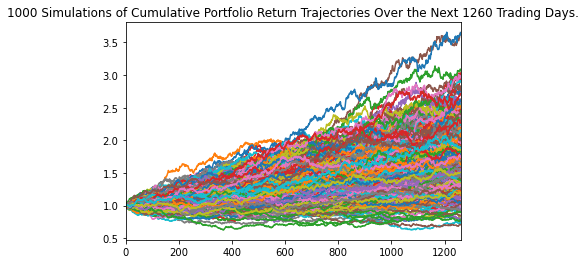

In [141]:
MC_line_plot = MC_dist.plot_simulation()

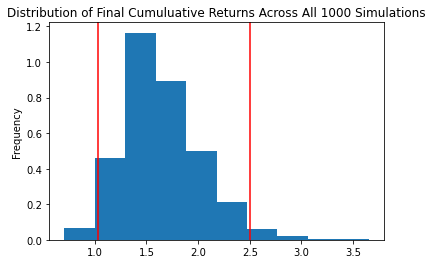

In [144]:
MC_dist_plot = MC_dist.plot_distribution()

In [ ]:
threshold_window = tkinter.Tk()
threshold_window.title("Risk Assessment & Rebalancing Criteria")
threshold_label_1 = tkinter.Label(threshold_window, text="Please let us know how risk averse you are:")

risk_level = [
    "Low Risk",
    "Low-Medium Risk",
    "Medium Risk",
    "Medium-High Risk",
    "High Risk"
]

threshold_clicked = StringVar()
threshold_clicked.set(risk_level[0]) # default value
threshold_menu = OptionMenu(threshold_window, threshold_clicked, *risk_level)

threshold_label_1.grid(row=0, column=0)
threshold_menu.grid(row=0, column=1)

chosen_risk = []
def risk_choice():
    chosen_risk.append(threshold_clicked.get())
    print ("You've selected " + threshold_clicked.get())
    
threshold_button_1 = tkinter.Button(threshold_window, text="Select level of risk", command=risk_choice)
threshold_button_1.grid(row=1, column=0)

threshold_window.mainloop()

In [ ]:
risk_dict = {
    "Low Risk":{
        "Upper Threshold": 0.01,
        "Lower Threshold": 0.001,
    },
    "Low-Medium Risk":{
        "Upper Threshold": 0.1,
        "Lower Threshold": 0.01,
    },
    "Medium Risk":{
        "Upper Threshold": 0.3,
        "Lower Threshold": 0.1,
    },
    "Medium-High Risk":{
        "Upper Threshold": 0.5,
        "Lower Threshold": 0.3,
    },
    "High Risk":{
        "Upper Threshold": 0.7,
        "Lower Threshold": 0.5,
    },
}

In [ ]:
if chosen_risk == risk_dict[0]:
    print(f"We do not recommend the following {stock} because it's volatility is too high )
    print(f"However, we do recommend the following {stock} because it is highly correlated but with less volatility.")
elif chosen_risk == risk_dict[1]:
    print(f"We do not recommend the following {stock} because it's volatility is just a bit high based off of your preferences and our calculations.")
    print(f"However, we do recommend the following {stock} because it is highly correlated but with less volatility.")
elif chosen_risk == risk_dict[2]:
    print(f"We do not recommend the following {stock} because it's volatility is just a bit high based off of your preferences and our calculations.")
    print(f"However, we do recommend the following {stock} because it is highly correlated but with less volatility.")
elif chosen_risk == risk_dict[3]:
    print(f"We do not recommend the following {stock} because it's volatility is just a bit low based off of your preferences and our calculations.")
    print(f"However, we do recommend the following {stock} because it is highly correlated but with more volatility.")
elif chosen_risk == risk_dict[4]:
    print(f"We do not recommend the following {stock} because it's volatility is just a bit low based off of your preferences and our calculations.")
    print(f"However, we do recommend the following {stock} because it is highly correlated but with more volatility.")